## Import paczek potrzebnych do laboratorium

In [18]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
# Obliczanie przedziału ufności
from sklearn.metrics import mean_squared_error

## Liczba uzytkownikow w kolejnych kwartalach (Facebook)

In [19]:
user_count_q = {
    'Q':
        ['Q3 08', 'Q1 09', 'Q2 09', 'Q3 09', 'Q4 09', 'Q1 10',
         'Q2 10', 'Q3 10', 'Q4 10', 'Q1 11', 'Q2 11', 'Q3 11',
         'Q4 11', 'Q1 12', 'Q2 12', 'Q3 12', 'Q4 12', 'Q1 13',
         'Q2 13', 'Q3 13', 'Q4 13', 'Q1 14', 'Q2 14', 'Q3 14',
         'Q4 14', 'Q1 15', 'Q2 15', 'Q3 15', 'Q4 15', 'Q1 16',
         'Q2 16', 'Q3 16', 'Q4 16', 'Q1 17', 'Q2 17', 'Q3 17', 'Q4 17'],
    'User count':
        [100, 197, 242, 305, 360, 431, 482, 550, 608, 680, 739, 800,
         845, 901, 955, 1007, 1056, 1110, 1155, 1189, 1228, 1276, 1317,
         1350, 1393, 1441, 1490, 1545, 1591, 1654, 1712, 1788, 1860, 1936,
         2006, 2072, 2129]
}

## Liczba uzytkownikow w kolejnych kwartalach (Facebook) - dane z lat 2008-2017 - usuwanie roku 2007 gdyz nie ma danych dla poprzedniej tabeli z tego roku


In [20]:
fb_stats_y_old = {
    'Y': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Income': [153, 272, 777, 1974, 3711, 5089, 7872, 12466, 17928, 27638, 40653],
    'Profit': [-138, -56, 229, 606, 1000, 53, 1500, 2940, 3688, 10217, 15934],
    'Employment': [450, 850, 1218, 2127, 3200, 4619, 6337, 9199, 12691, 17048, 25105]
}

# Poprawione dane z 2008-2017
fb_stats_y = {
    'Y': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Income': [272, 777, 1974, 3711, 5089, 7872, 12466, 17928, 27638, 40653],
    'Profit': [-56, 229, 606, 1000, 53, 1500, 2940, 3688, 10217, 15934],
    'Employment': [850, 1218, 2127, 3200, 4619, 6337, 9199, 12691, 17048, 25105]
}

## Tworzenie DataFrame z danymi 

In [21]:
user_count_df = pd.DataFrame(data=user_count_q)
fb_stats_y_df = pd.DataFrame(data=fb_stats_y)
print(fb_stats_y_df)
print(user_count_df)

      Y  Income  Profit  Employment
0  2008     272     -56         850
1  2009     777     229        1218
2  2010    1974     606        2127
3  2011    3711    1000        3200
4  2012    5089      53        4619
5  2013    7872    1500        6337
6  2014   12466    2940        9199
7  2015   17928    3688       12691
8  2016   27638   10217       17048
9  2017   40653   15934       25105
        Q  User count
0   Q3 08         100
1   Q1 09         197
2   Q2 09         242
3   Q3 09         305
4   Q4 09         360
5   Q1 10         431
6   Q2 10         482
7   Q3 10         550
8   Q4 10         608
9   Q1 11         680
10  Q2 11         739
11  Q3 11         800
12  Q4 11         845
13  Q1 12         901
14  Q2 12         955
15  Q3 12        1007
16  Q4 12        1056
17  Q1 13        1110
18  Q2 13        1155
19  Q3 13        1189
20  Q4 13        1228
21  Q1 14        1276
22  Q2 14        1317
23  Q3 14        1350
24  Q4 14        1393
25  Q1 15        1441
26  Q2 15 

In [22]:
def convert_quarter_to_year(quarter) -> int:
    year_str = quarter.split(' ')[1]
    year_int = 2000 + int(year_str)
    return year_int


In [23]:
user_count_y_df = user_count_df.copy()
user_count_y_df['Q'] = user_count_df['Q'].map(convert_quarter_to_year)
# Alternatywa byloby zaladowanie danych z Q4 jako max tez dobrze
user_count_y_df = user_count_y_df
user_count_y_df = user_count_y_df.groupby('Q', as_index=False).max()
user_count_y_df.rename(columns={'Q': 'Y'}, inplace=True)
print(user_count_y_df)

      Y  User count
0  2008         100
1  2009         360
2  2010         608
3  2011         845
4  2012        1056
5  2013        1228
6  2014        1393
7  2015        1591
8  2016        1860
9  2017        2129


In [24]:
fb_stats_y_df = pd.DataFrame(data=fb_stats_y)
# Calculate costs
fb_stats_y_df['Costs'] = fb_stats_y_df['Income'] - fb_stats_y_df['Profit']
# fb_stats_y_df.drop([0], inplace=True)
fb_stats_y_df.reset_index(drop=True, inplace=True)
fb_stats_y_df.insert(3, 'User count', user_count_y_df['User count'])
print(fb_stats_y_df)


      Y  Income  Profit  User count  Employment  Costs
0  2008     272     -56         100         850    328
1  2009     777     229         360        1218    548
2  2010    1974     606         608        2127   1368
3  2011    3711    1000         845        3200   2711
4  2012    5089      53        1056        4619   5036
5  2013    7872    1500        1228        6337   6372
6  2014   12466    2940        1393        9199   9526
7  2015   17928    3688        1591       12691  14240
8  2016   27638   10217        1860       17048  17421
9  2017   40653   15934        2129       25105  24719


## Tworzenie wykresu iloczynu kartezjanskiego w celu wyzanczeniach zaleznosci miedzy danymi

array([[<Axes: xlabel='Y', ylabel='Y'>,
        <Axes: xlabel='Income', ylabel='Y'>,
        <Axes: xlabel='Profit', ylabel='Y'>,
        <Axes: xlabel='User count', ylabel='Y'>,
        <Axes: xlabel='Employment', ylabel='Y'>,
        <Axes: xlabel='Costs', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='Income'>,
        <Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='Profit', ylabel='Income'>,
        <Axes: xlabel='User count', ylabel='Income'>,
        <Axes: xlabel='Employment', ylabel='Income'>,
        <Axes: xlabel='Costs', ylabel='Income'>],
       [<Axes: xlabel='Y', ylabel='Profit'>,
        <Axes: xlabel='Income', ylabel='Profit'>,
        <Axes: xlabel='Profit', ylabel='Profit'>,
        <Axes: xlabel='User count', ylabel='Profit'>,
        <Axes: xlabel='Employment', ylabel='Profit'>,
        <Axes: xlabel='Costs', ylabel='Profit'>],
       [<Axes: xlabel='Y', ylabel='User count'>,
        <Axes: xlabel='Income', ylabel='User count'>,
        <Axes: xla

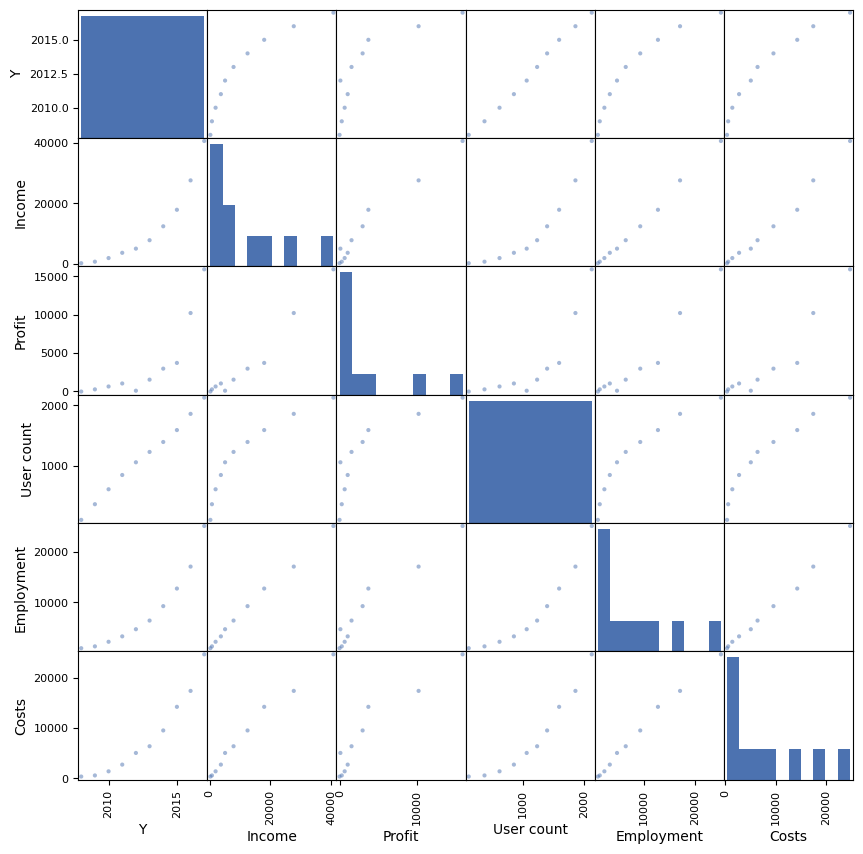

In [25]:
pd.plotting.scatter_matrix(fb_stats_y_df, figsize=(10, 10))

## Dane dla przyszlych lat (2018-2022) potrzbne do weryfikowania predyckji modelu

In [26]:
user_count_q_test = {
    'Q':
    ['Q1 18', 'Q2 18', 'Q3 18', 'Q4 18',
    'Q1 19', 'Q2 19', 'Q3 19', 'Q4 19',
    'Q1 20', 'Q2 20', 'Q3 20', 'Q4 20',
    'Q1 21', 'Q2 21', 'Q3 21', 'Q4 21',
    'Q1 22', 'Q2 22', 'Q3 22', 'Q4 22'],
    'User count': 
    [2196, 2234, 2271, 2320, 2375, 2414, 2449, 2498, 2603, 2701, 2740, 2797,
    2853, 2895, 2910, 2912, 2936, 2934, 2958, 2963]
}

fb_stats_y_test = {
    'Y': [2018, 2019, 2020, 2021, 2022],
    'Income': [55838, 70697, 85965, 117929, 116609],
    'Profit': [22112, 18485, 29146, 39370, 23200],
    'Costs': [33726, 52212, 56819, 78559, 93409],
    'Employment': [35587, 44942, 58604, 71970, 87314],
    'User count': [2320, 2498, 2797, 2912, 2963]
}

In [27]:
user_count_test_df = pd.DataFrame(data=user_count_q_test)
fb_stats_y_test_df = pd.DataFrame(data=fb_stats_y_test)
print(user_count_test_df)
print(fb_stats_y_test_df)

        Q  User count
0   Q1 18        2196
1   Q2 18        2234
2   Q3 18        2271
3   Q4 18        2320
4   Q1 19        2375
5   Q2 19        2414
6   Q3 19        2449
7   Q4 19        2498
8   Q1 20        2603
9   Q2 20        2701
10  Q3 20        2740
11  Q4 20        2797
12  Q1 21        2853
13  Q2 21        2895
14  Q3 21        2910
15  Q4 21        2912
16  Q1 22        2936
17  Q2 22        2934
18  Q3 22        2958
19  Q4 22        2963
      Y  Income  Profit  Costs  Employment  User count
0  2018   55838   22112  33726       35587        2320
1  2019   70697   18485  52212       44942        2498
2  2020   85965   29146  56819       58604        2797
3  2021  117929   39370  78559       71970        2912
4  2022  116609   23200  93409       87314        2963


## Funkcja do obliczania statystyki modelu

In [28]:
def calculate_model_stats(y_hat, y_true, X) -> dict:
    # Dodajemy kolumne jedynek dla wyrazu wolnego 
    X = np.insert(X, 0, 1, axis=1) 
    
    residuals = y_true - y_hat
    # Obliczamy sume kwadratow reszt(RSS - Residual Sum of Squares)
    # RSS = e^T * e, gdzie e to wektor reszt
    residuals_sum_squared = residuals.T @ residuals 
    
    # Obliczamy estymator wariancji resztowej (σ²)
    # σ² = RSS/(n-k), gdzie:
    # n = liczba obserwacji (y_hat.shape[0])
    # k = liczba parametrów modelu (X.shape[1])
    standard_variance = residuals_sum_squared[0, 0] / (y_hat.shape[0] - X.shape[1])
    
    # Var(β̂) = σ² × (X^T × X)^(-1)
    model_coefficients_covariance = standard_variance * np.linalg.inv(X.T @ X) # Liczymy macierz kowariancji wspl. modelu
    stats = dict()
    
    # Obliczamy błędy standardowe dla każdego współczynnika
    # SE(β̂ᵢ) = √Var(β̂ᵢ)
    for number in range(model_coefficients_covariance.shape[0]):
        stats['Standard errror a' + str(number)] = np.sqrt(model_coefficients_covariance[number, number])
    
    # Na koniec blad standardowy modelu
    stats['Standard error e'] = np.sqrt(standard_variance)
    return stats
    
    

## Funkcje pomocnicze dla szeregow czasowych z uzyciem kwartalow

In [29]:
def transform_quarter_to_number(string) -> int:
    if ' ' not in string:
        raise ValueError(f"Invalid format for quarter: {string}")
    quarter, year = string.split(' ')
    quarters = {'Q1': 0, 'Q2': 1, 'Q3': 2, 'Q4': 3}
    year = int(year) - 8
    return year * 4 + quarters[quarter]

def transform_number_to_quarter(number) -> str:
    year = (number // 4) + 8
    quarters = {0: 'Q1', 1: 'Q2', 2: 'Q3', 3: 'Q4'}
    quarter = quarters[number % 4]
    quarter_string = quarter + ' {:02d}'.format(year)
    return quarters[quarter] + ' ' + str(year)


In [30]:
user_count_df['Q'] = user_count_df['Q'].astype(str).map(transform_quarter_to_number)
user_count_test_df['Q'] = user_count_test_df['Q'].astype(str).map(transform_quarter_to_number)
print(user_count_df)
print(user_count_test_df)

     Q  User count
0    2         100
1    4         197
2    5         242
3    6         305
4    7         360
5    8         431
6    9         482
7   10         550
8   11         608
9   12         680
10  13         739
11  14         800
12  15         845
13  16         901
14  17         955
15  18        1007
16  19        1056
17  20        1110
18  21        1155
19  22        1189
20  23        1228
21  24        1276
22  25        1317
23  26        1350
24  27        1393
25  28        1441
26  29        1490
27  30        1545
28  31        1591
29  32        1654
30  33        1712
31  34        1788
32  35        1860
33  36        1936
34  37        2006
35  38        2072
36  39        2129
     Q  User count
0   40        2196
1   41        2234
2   42        2271
3   43        2320
4   44        2375
5   45        2414
6   46        2449
7   47        2498
8   48        2603
9   49        2701
10  50        2740
11  51        2797
12  52        2853
13  53      

## Trenowanie modelu szeregu czasowego 

In [31]:
R_train = user_count_df['Q'].to_numpy().reshape(-1, 1) 
U_train = user_count_df['User count'].to_numpy().reshape(-1, 1)
R_test = user_count_test_df['Q'].to_numpy().reshape(-1, 1)
U_test = user_count_test_df['User count'].to_numpy().reshape(-1, 1)

linear_regression = LinearRegression()
linear_regression.fit(R_train, U_train)

print(linear_regression)

print(f'User count R^2: {linear_regression.score(R_test, U_test):}')
print(f"Model: U = {linear_regression.intercept_[0]:} + {linear_regression.coef_[0][0]:} * R")

LinearRegression()
User count R^2: 0.922835330027184
Model: U = 17.644524054524254 + 52.63808326028686 * R


# Errors for out model

In [32]:
errors = calculate_model_stats(linear_regression.predict(R_train), U_train, R_train) 
print(errors)

{'Standard errror a0': np.float64(13.43654082331701), 'Standard errror a1': np.float64(0.5704188428748667), 'Standard error e': np.float64(37.20850888700467)}


# Wizualizacja modelu szeregu czasowego v2

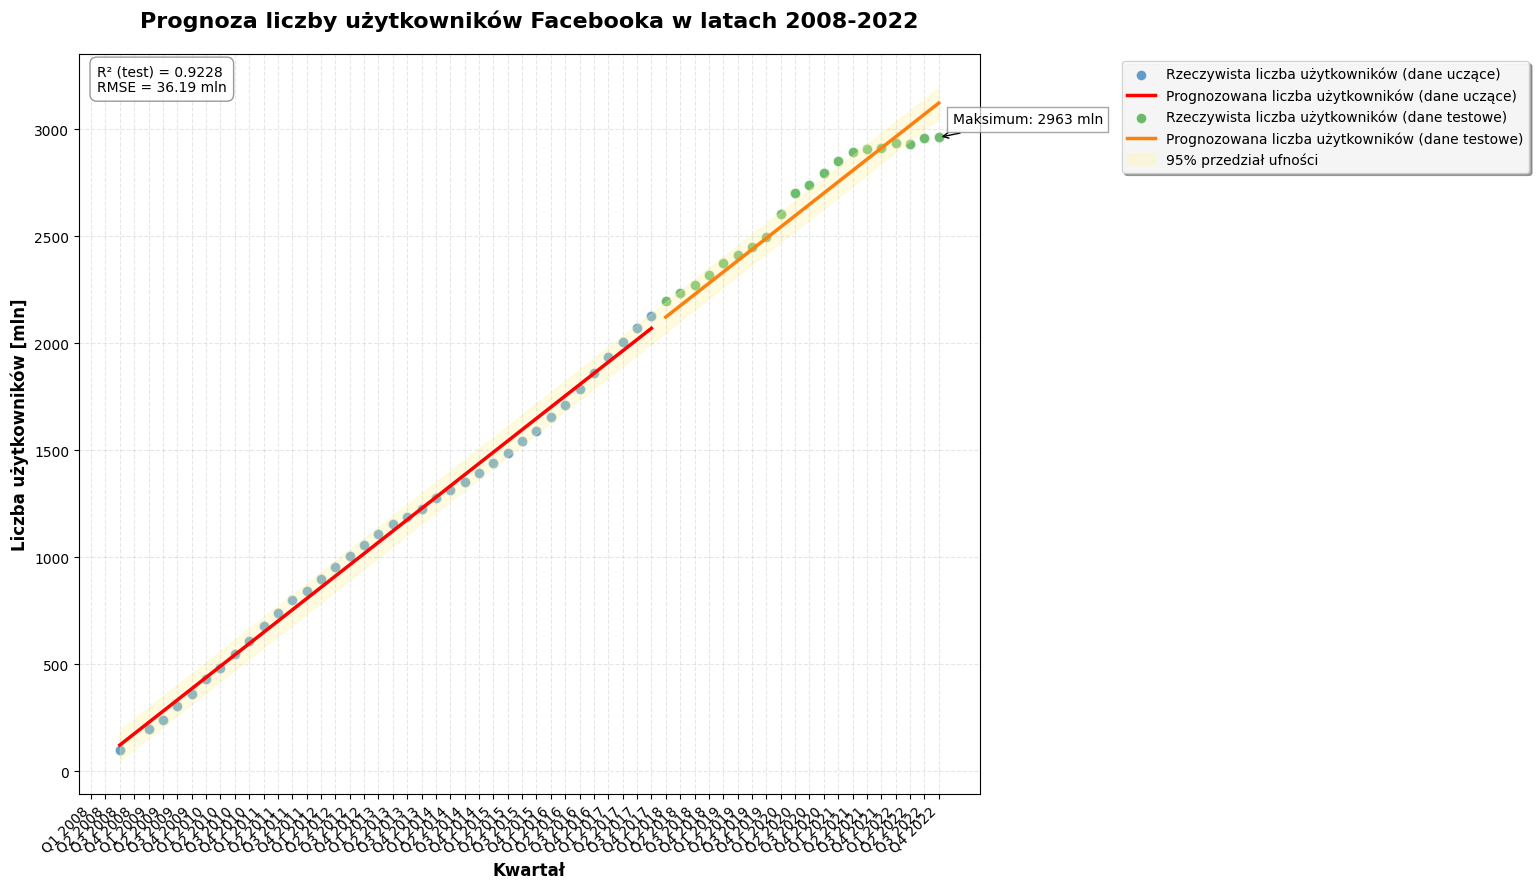

In [34]:
# Funckja zmieniona w celu lepszej czytelnosci
def transform_number_to_quarter_custom(number) -> str:
    quarters = {0: 'Q1', 1: 'Q2', 2: 'Q3', 3: 'Q4'} 
    year = 2008 + (number // 4)
    quarter = quarters[number % 4]
    return f'{quarter} {year}'

# Przygotowanie danych
train_predictions = linear_regression.predict(R_train)
test_predictions = linear_regression.predict(R_test)

# Obliczanie przedziału ufności
mse = mean_squared_error(U_train, train_predictions)
std_dev = np.sqrt(mse)
confidence_interval = 1.96 * std_dev  # 95% przedział ufności

# Tworzenie wykresu z większym rozmiarem i lepszymi proporcjami
plt.figure(figsize=(16, 9))

# Konfiguracja stylu
plt.style.use('seaborn-v0_8-deep')
colors = {
    'train_dots': '#1f77b4',
    'train_line': '#ff0000',
    'test_dots': '#2ca02c',
    'test_line': '#ff7f0e',
    'confidence': '#fff59d'
}

# Dane treningowe
plt.scatter(R_train, U_train, color=colors['train_dots'], alpha=0.7, s=60, 
           label='Rzeczywista liczba użytkowników (dane uczące)',
           edgecolor='white', linewidth=1)
plt.plot(R_train, train_predictions, color=colors['train_line'], linewidth=2.5,
         label='Prognozowana liczba użytkowników (dane uczące)')

# Dane testowe
plt.scatter(R_test, U_test, color=colors['test_dots'], alpha=0.7, s=60,
           label='Rzeczywista liczba użytkowników (dane testowe)',
           edgecolor='white', linewidth=1)
plt.plot(R_test, test_predictions, color=colors['test_line'], linewidth=2.5,
         label='Prognozowana liczba użytkowników (dane testowe)')

# Przedział ufności z lepszą przezroczystością i kolorem
all_quarters = np.concatenate([R_train.flatten(), R_test.flatten()])
all_predictions = np.concatenate([train_predictions.flatten(), test_predictions.flatten()])
plt.fill_between(
    all_quarters,
    all_predictions - confidence_interval,
    all_predictions + confidence_interval,
    color=colors['confidence'],
    alpha=0.3,
    label='95% przedział ufności'
)

# Formatowanie osi i etykiet
plt.xlabel('Kwartał', fontsize=12, fontweight='bold')
plt.ylabel('Liczba użytkowników [mln]', fontsize=12, fontweight='bold')
plt.title('Prognoza liczby użytkowników Facebooka w latach 2008-2022', 
         fontsize=16, pad=20, fontweight='bold')

# Generowanie etykiet osi X używając zdefiniowanych funkcji
x_ticks = range(0, 60)
x_labels = [transform_number_to_quarter_custom(q) for q in x_ticks]
plt.xticks(x_ticks, x_labels, rotation=45, ha='right')

# Dodanie siatki z lepszą widocznością
plt.grid(True, linestyle='--', alpha=0.3)

# Lepsze umiejscowienie legendy i dodanie ramki
legend = plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', 
                   frameon=True, fancybox=True, shadow=True)
legend.get_frame().set_alpha(0.9)

# Dodanie informacji o R² w lepszym formacie
r2_score = linear_regression.score(R_test, U_test)
stats_text = f'R² (test) = {r2_score:.4f}\n'
stats_text += f'RMSE = {np.sqrt(mse):.2f} mln'

plt.text(0.02, 0.95, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', 
                  edgecolor='gray', 
                  alpha=0.8,
                  boxstyle='round,pad=0.5'),
         fontsize=10)

# Dodanie adnotacji dla ważnych punktów
max_users_idx = np.argmax(U_test)
plt.annotate(f'Maksimum: {U_test[max_users_idx][0]:.0f} mln',
            xy=(R_test[max_users_idx], U_test[max_users_idx]),
            xytext=(10, 10), textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7),
            arrowprops=dict(arrowstyle='->'))

# Dostosowanie układu i marginesów 
plt.tight_layout()

# Pokazanie wykresu
plt.show()